In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from time import time

In [41]:
N = 200
nbins = 10
ra, dec = np.random.rand(N), np.random.rand(N)

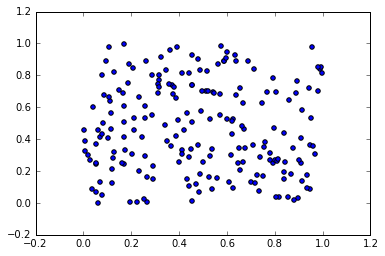

In [20]:
plt.scatter(ra,dec)

In [26]:
def compute_corr_raw(ra,dec):
    cts_tot = np.zeros(10)
    bins=np.zeros(nbins+1)
    for i in range(N):
        for j in range(N):
            dist = np.sqrt((ra[i]-ra[j])**2 + (dec[i]-dec[j]**2))
            cts, bins = np.histogram(dist,bins=nbins,range=(0,1))
            cts_tot += cts
    ctrs = bins + (bins[1]-bins[0])/2
    ctrs = ctrs[:-1]
    return cts_tot, ctrs

that took  2.82617592812


/Users/mbaumer/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in sqrt


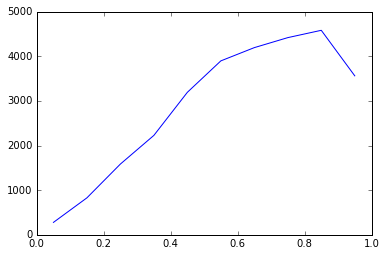

In [22]:
tic = time()
cts_tot, ctrs = compute_corr_raw(ra,dec)
toc = time()
print 'that took ', toc-tic
plt.plot(ctrs,cts_tot)

## Scaling of $O(N^2)$ algorithm

/Users/mbaumer/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in sqrt


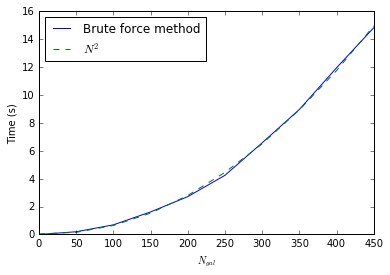

In [40]:
max_N = 500
N_choices = np.arange(max_N,step=50)
time_vec = []
for N in N_choices:
    ra, dec = np.random.rand(N), np.random.rand(N)
    tic = time()
    cts_tot, ctrs = compute_corr_raw(ra,dec)
    toc = time()
    time_vec.append(toc-tic)
plt.plot(N_choices,time_vec,label='Brute force method')
coeffs = np.polyfit(N_choices,time_vec,2)
N_interp = np.arange(max_N)
plt.plot(N_choices,coeffs[0]*N_choices**2+coeffs[1]*N_choices+coeffs[2],ls='dashed',label=r'$N^2$')
plt.xlabel(r'$N_{gal}$')
plt.ylabel('Time (s)')
plt.legend(loc=0)

## With treecorr

In [65]:
import treecorr

def compute_corr_treecorr(ra,dec):
    cat = treecorr.Catalog(x=ra,y=dec)
    nn = treecorr.NNCorrelation(min_sep=0.1,max_sep =1,nbins=nbins)
    nn.process(cat)
    return nn.npairs, np.exp(nn.logr)

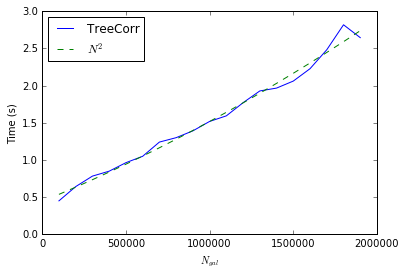

In [69]:
max_N = 2000000
N_choices = np.arange(100000, max_N,step=100000)
time_vec = []
for N in N_choices:
    ra, dec = np.random.rand(N), np.random.rand(N)
    tic = time()
    cts_tot, ctrs = compute_corr_treecorr(ra,dec)
    toc = time()
    time_vec.append(toc-tic)
plt.plot(N_choices,time_vec,label='TreeCorr')
coeffs = np.polyfit(N_choices,time_vec,2)
N_interp = np.arange(max_N)
plt.plot(N_choices,coeffs[0]*N_choices**2+coeffs[1]*N_choices+coeffs[2],ls='dashed',label=r'$N^2$')
plt.xlabel(r'$N_{gal}$')
plt.ylabel('Time (s)')
plt.legend(loc=0)